# Example: Centroid Vetting.
### How to look for centroid offset between in and out of transit
In this example we show how to use the vetting module to visualize the transit and take the difference between the in transit and out of transit to determine if there is a centroid offset between the two.

In [1]:
import numpy
import matplotlib
import exovetter as exo
from exovetter import const
from exovetter import utils
import exovetter.vetters as vet
import lightkurve as lk
import astropy.units as u

In [2]:
#Name of our first TOI Example
candidate = "TOI 1013.01"

### Use a utility function `get_mast_tce` to get the properties of the candidate and put into a tce object.

In [3]:
tce = utils.get_mast_tce(candidate)
tce

[{'period': <Quantity 5.42555479 d>,
  'epoch': <Quantity 58493.86798 d>,
  'epoch_offset': <Quantity -2400000.5 d>,
  'depth': <Quantity 0.01493963>,
  'duration': <Quantity 0.15745833 d>,
  'target': 'TOI 1013.01'}]

### Grab the light curve using lightkurve

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

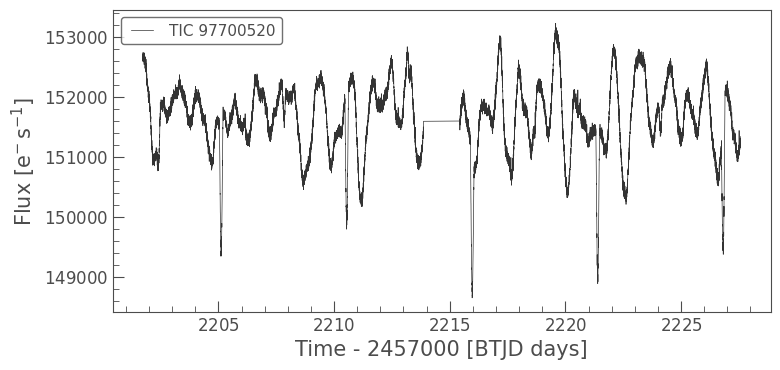

In [4]:
lc = lk.search_lightcurve(candidate, sector=33, exptime=120).download()
lc.plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

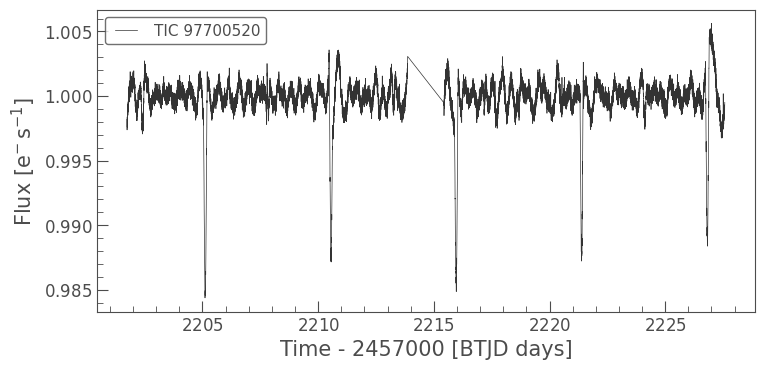

In [12]:
#Flatten the light curve to remove some of the variability
flatlc = lc.flatten(window_length=501)
flatlc.plot()

## Visualize the transits 
Use `vet.VizTransits` to plot individual transits as well as the folded and smoothed transits.

[131. 132. 133. 134. 135.]
6
[130. 130. 130. ... 135. 135. 135.]


{'num_transits': 5}

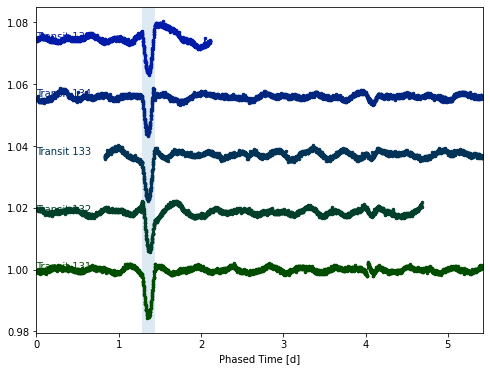

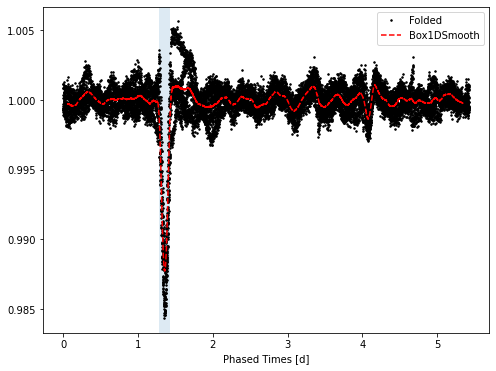

In [10]:
#Initiate the vetter
viz = vet.VizTransits()

#Run the vetter on the tce and lightcurve of your choice.
viz.run(tce[0], flatlc, plot=True)

### Zoom in on the transit

[131. 132. 133. 134. 135.]
6
[130. 130. 130. ... 135. 135. 135.]


{'num_transits': 5}

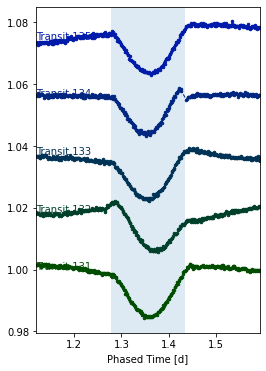

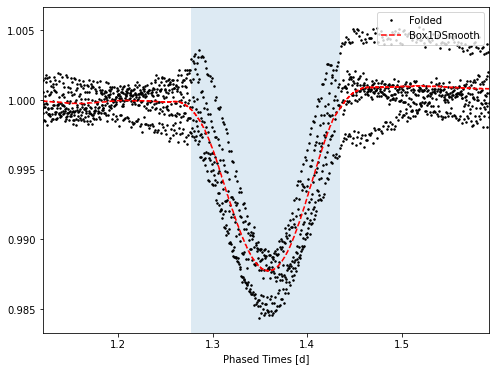

In [11]:
viz = vet.VizTransits(transit_only=True)
viz.run(tce[0], flatlc, plot=True)

## Run the Centroid Vetter
The Centroid Vetter is run in the same way as the VizTransit method. It returns the average offset and significance that the event is on the target.
You get several plots showing the out of transits, in transit, and difference image. The centroids of each are measured using a Gaussian.
For the OOT and In-Transit, the centroid is constrained to the central +/-1 pixel in box row and column direction.
As input, the Centroid Vetter requires a Target Pixel File objects from lightkurve.

This example shows no significant offset between the out of transit location and the difference image centroid.

{'offset': 0.021920794097749094, 'significance': array([0.43039962])}

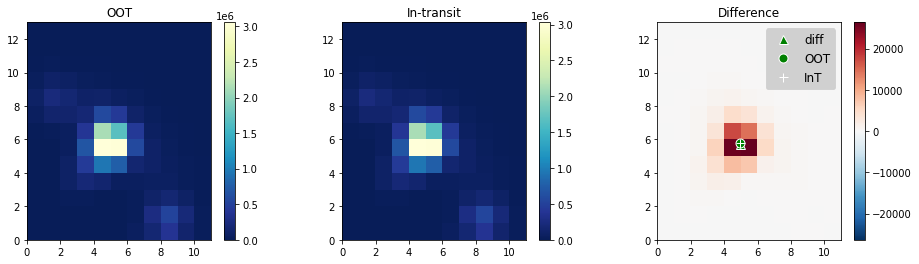

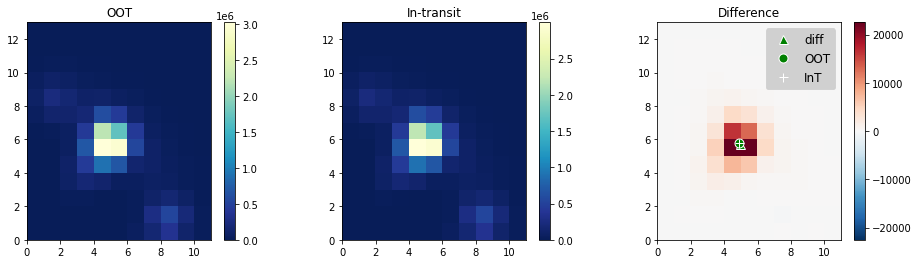

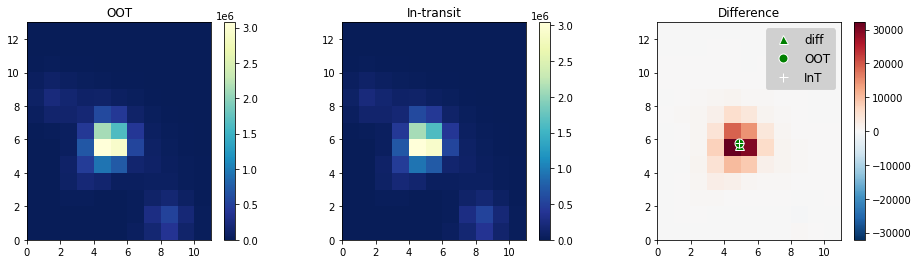

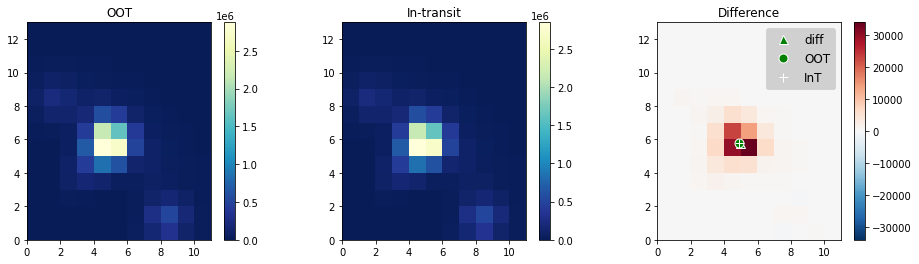

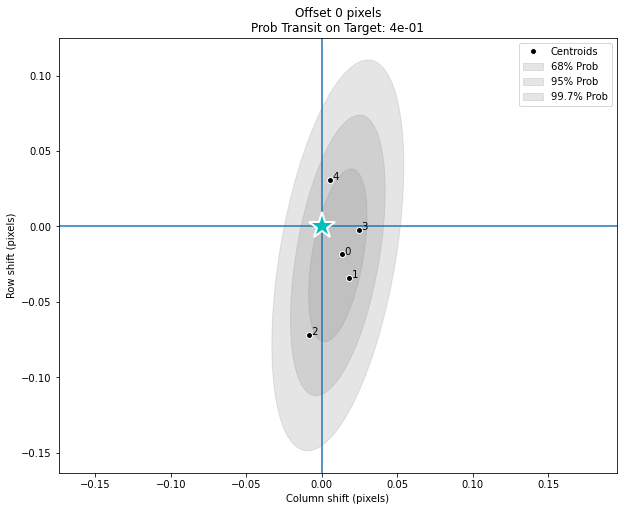

In [13]:
#First we need to download the Target Pixel Information.
#We use a lightkurve method for this
tpf = lk.search_targetpixelfile(candidate, sector=33, exptime=120).download()
cent = vet.Centroid()
cent.run(tce[0],tpf, plot=True)

# Example 2.  An example with a centroid offset.
This time we will define our own TCE from scratch.
Here we use a qlp FFI light curve and use TESSCut to cutout the FFIs to get the target pixel file.
Note the significance that is returned is the significance that the difference image location is the same as the out of transit location, i.e. the significance that the transit occurs on the star in question.

In [29]:
from exovetter import const as exo_const
from exovetter.tce import Tce

def get_qlp_lk(target, sector, author = "qlp", mission = "TESS", size = 11):
    """Returns lc and tpf for a given sector"""
    
    lc = lc = lk.search_lightcurve(target, sector=sector,
                              cadence="ffi",author=author).download()
    tpf = lk.search_tesscut(target, sector = sector).download(cutout_size = size)
    
    return lc, tpf

In [30]:
mytce = Tce(target_name = "TIC 159573320",
            sector = 14,
            period = 10.8766 * u.day,
           epoch = 1687.4658 * u.day,
           epoch_offset =  exo_const.btjd,
           depth = .006943255 * exo_const.frac_amp,
           duration = 4 * u.h)

lc, tpf = get_qlp_lk(mytce['target_name'], mytce['sector'])

[0. 1. 2.]
4
[-1. -1. -1. ...  2.  2.  2.]


{'num_transits': 3}

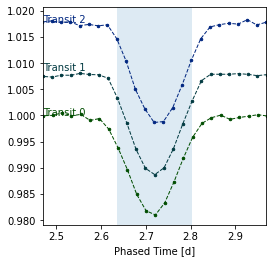

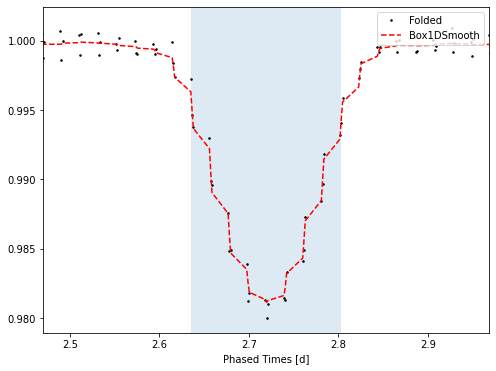

In [39]:
viz = vet.VizTransits(transit_only=True, smooth=11)
viz.run(mytce, lc, plot=True)

Offset in pixels: 1.836958 


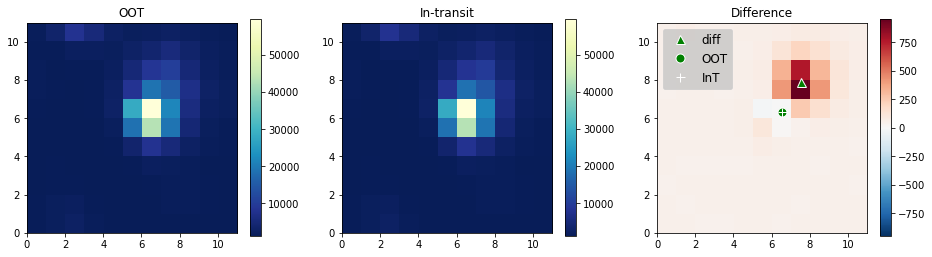

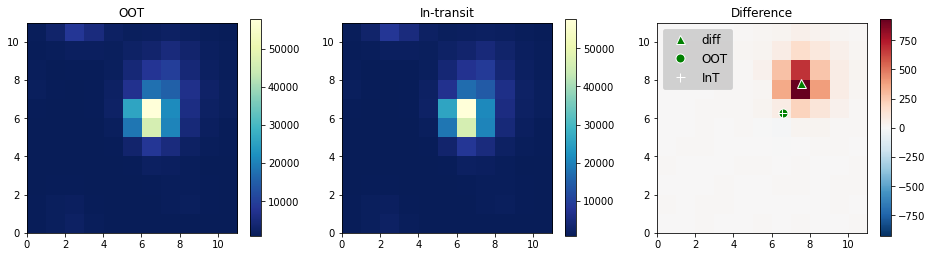

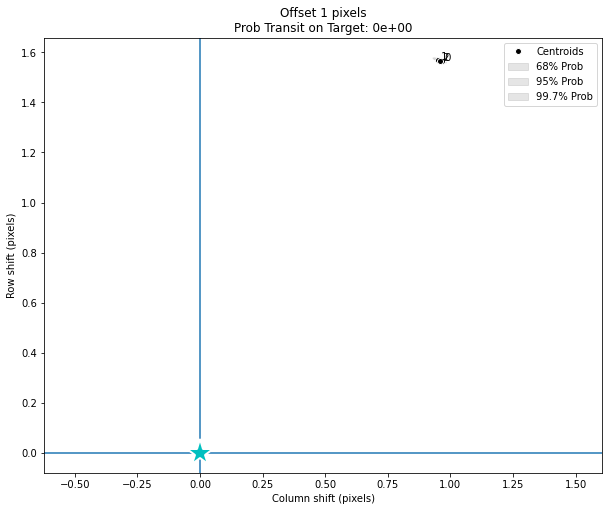

In [46]:
cent = vet.Centroid()
result = cent.run(mytce, tpf, plot=True)
print("Offset in pixels: %f " % result['offset'])

In [43]:
print(offset)

{'offset': 1.836957624965283, 'significance': array([0.])}


## Example 3. A third example based on a TOI with a possible offset.


In [14]:
candidate = "TOI 565.01"
tce = utils.get_mast_tce(candidate)
tce

[{'period': <Quantity 3.727891 d>,
  'epoch': <Quantity 58519.370491 d>,
  'epoch_offset': <Quantity -2400000.5 d>,
  'depth': <Quantity 0.0178643>,
  'duration': <Quantity 0.16139208 d>,
  'target': 'TOI 565.01'}]

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

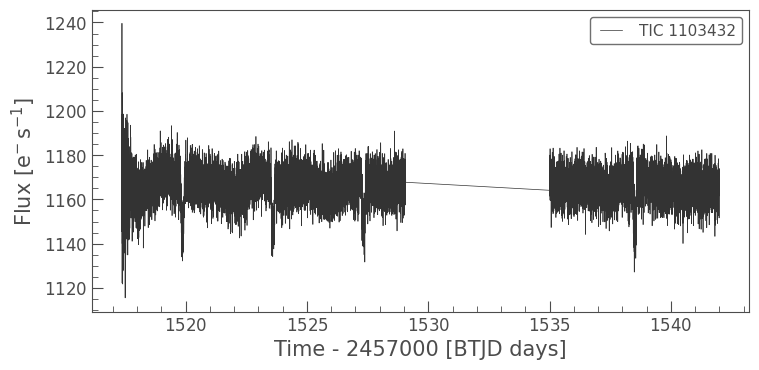

In [15]:
lc = lk.search_lightcurve(candidate)[0].download()
lc.plot()

[0. 1. 2. 4. 5. 6.]
7
[-1. -1. -1. ...  6.  6.  6.]


{'num_transits': 6}

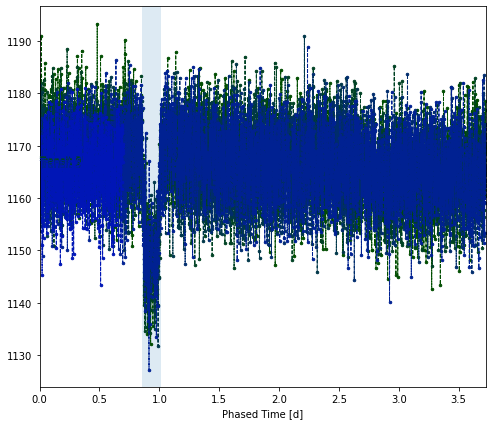

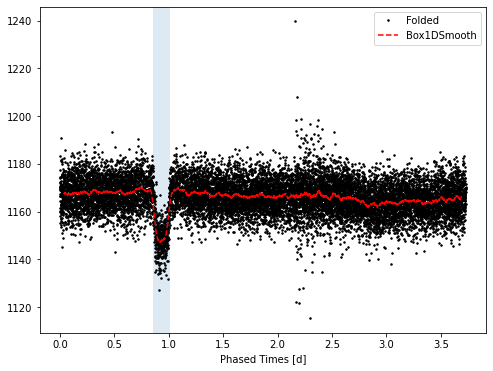

In [16]:
viz = vet.VizTransits(max_transits=8)
viz.run(tce[0],lc, plot=True, )

{'offset': 1.288129664698467, 'significance': array([3.84724258e-145])}

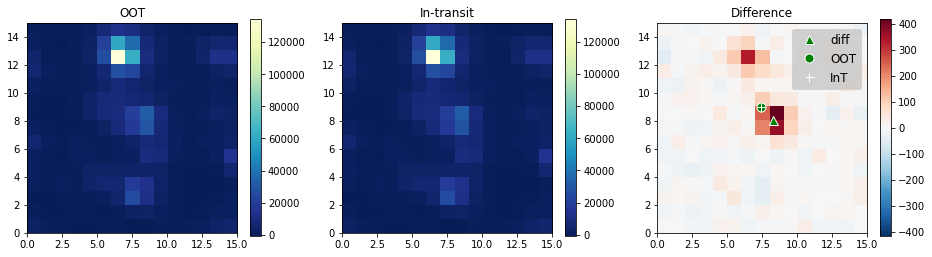

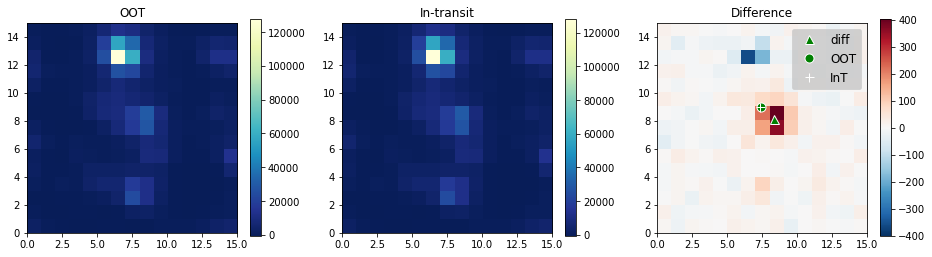

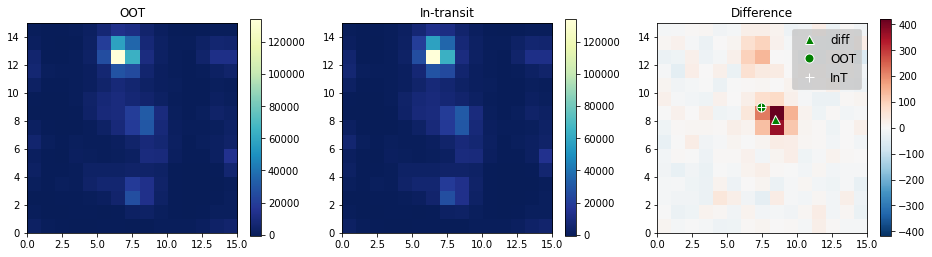

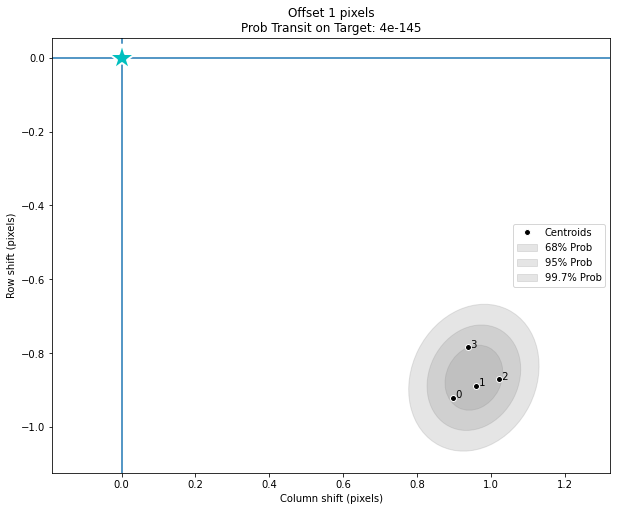

In [17]:
#Examine difference images and measure centroids
tpf = lk.search_targetpixelfile(candidate)[0].download()
cent = vet.Centroid()
cent.run(tce[0],tpf,plot=True)